17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6833 - loss: 0.5815 - val_accuracy: 0.8384 - val_loss: 0.3565
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9284 - loss: 0.2046 - val_accuracy: 0.8440 - val_loss: 0.3633
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9931 - loss: 0.0571 - val_accuracy: 0.8464 - val_loss: 0.3794
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9992 - loss: 0.0144 - val_accuracy: 0.8452 - val_loss: 0.4114
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9995 - loss: 0.0067 - val_accuracy: 0.8450 - val_loss: 0.4356
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8438 - val_loss: 0.4651
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8452 - val_loss: 0.4867
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accurac

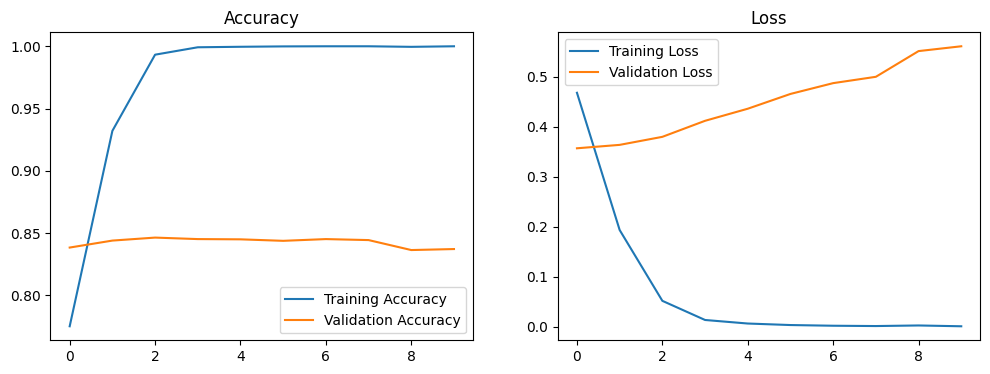

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


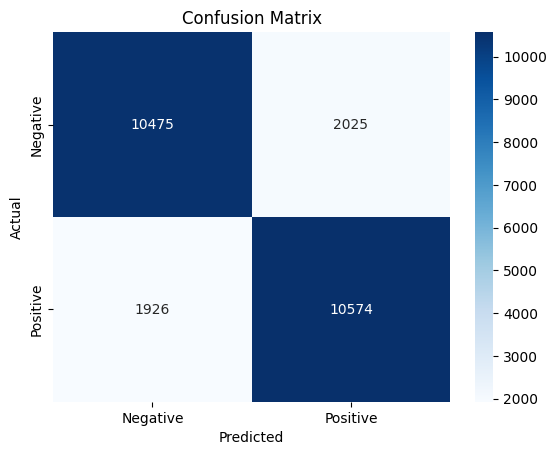

              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84     12500
    Positive       0.84      0.85      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



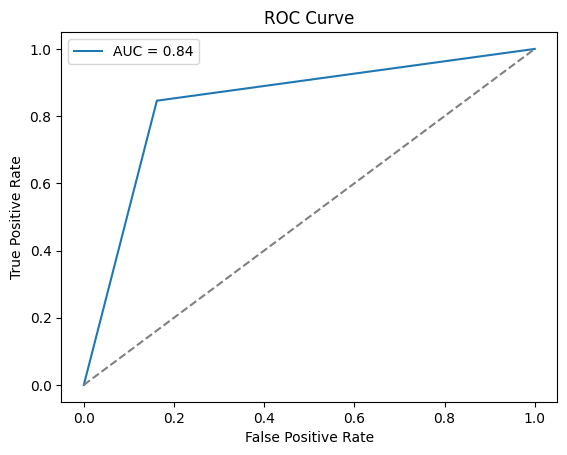

In [ ]:
# Install required libraries
!pip install tensorflow keras

# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform length
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model on the test set
results = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Predictions and confusion matrix
predictions = (model.predict(x_test) > 0.5).astype("int32").flatten()
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
